<a href="https://colab.research.google.com/github/yaajnu/ColabNotebooks/blob/master/prediction_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install flask
!pip install flask_sqlalchemy
!pip install datetime
!pip install flask-ngrok

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 235kB 10.7MB/s 


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 33.8MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [ ]:
%mkdir templates -p

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from flask import Flask,render_template,request,redirect,url_for,send_from_directory
from datetime import datetime
import numpy as np
from flask_sqlalchemy import SQLAlchemy
from datetime import datetime
from flask_ngrok import run_with_ngrok
import os

In [ ]:
path=Path('/content/drive/My Drive/Data/train')
path1=Path('/content/drive/My Drive/Python Projects/Upload')
path_templates=Path('/content/drive/My Drive/Python Projects/Templates')

In [ ]:
learn=load_learner(path)

In [ ]:
os.listdir(path1)[1]


'_main_amber_5.jpg'

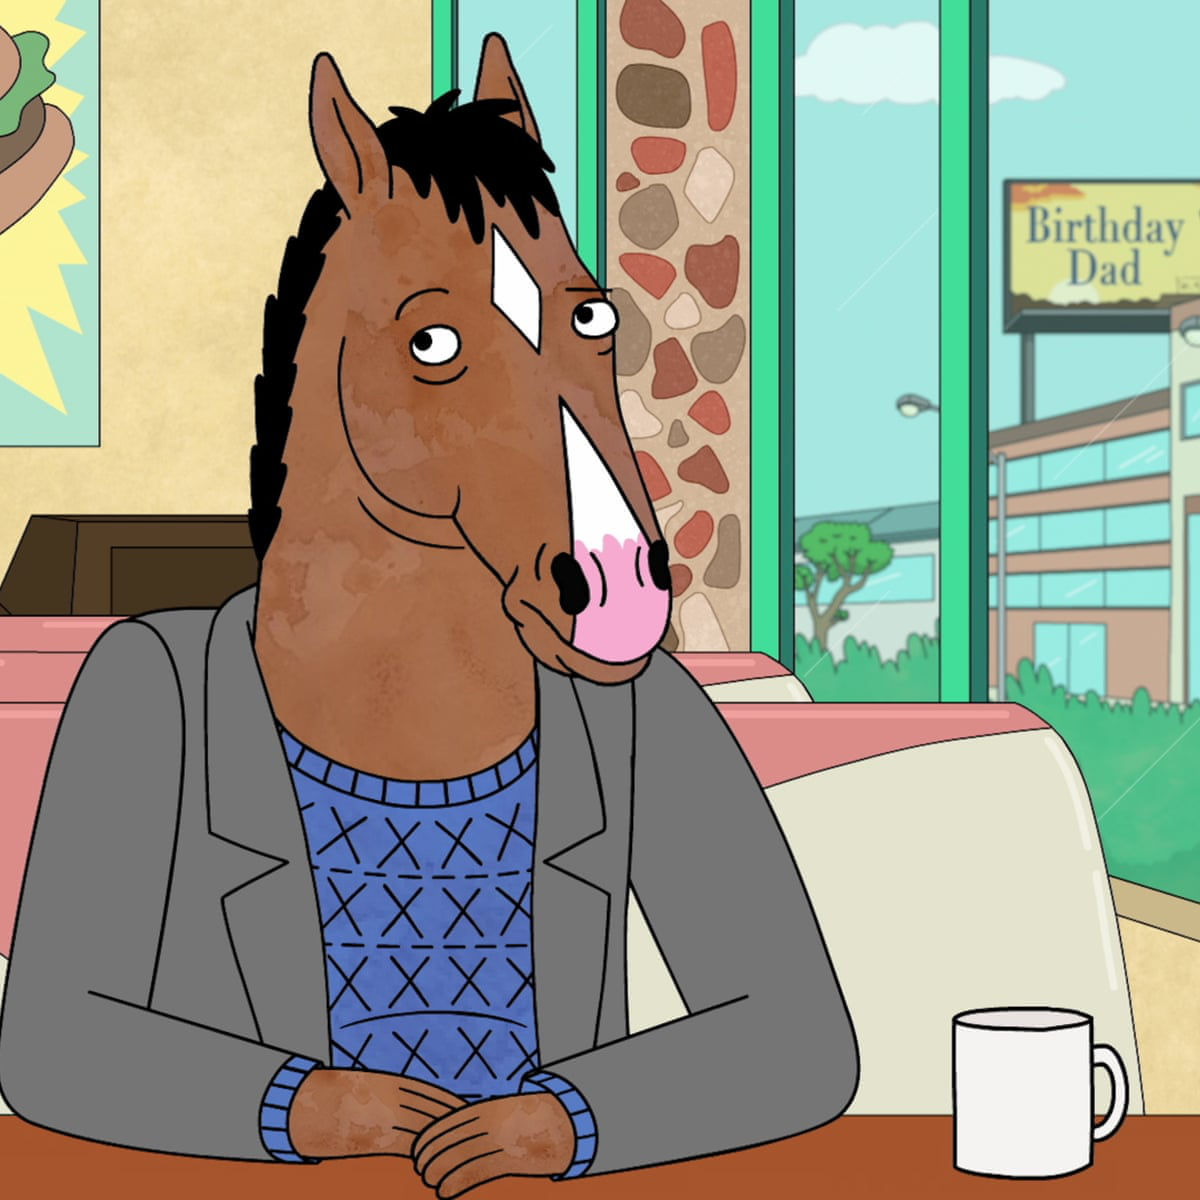

In [ ]:
img=open_image(path1/os.listdir(path1)[0])
img 

In [ ]:
prediction,idsx,a=learn.predict(img)
prediction.obj

'Horse'

In [ ]:
import shutil
b=Path('/content/templates')
a=os.listdir(path_templates)
for file in a:
  shutil.copy(path_templates/file,b)

In [ ]:
from flask import Flask,render_template,request,redirect,url_for,send_from_directory
from flask_sqlalchemy import SQLAlchemy
from datetime import datetime
from flask_ngrok import run_with_ngrok
import os
app=Flask(__name__)
run_with_ngrok(app)
Upload='/content/drive/My Drive/Python Projects/Upload'
app.config['UPLOAD_FOLDER']=Upload
@app.route('/',methods=['GET','POST'])
def Uploaded():
    if request.method=='POST':
        if 'file' not in request.files:
            return redirect('/')
        file=request.files['file']
        if file.filename!='':
            file.save(os.path.join(app.config['UPLOAD_FOLDER'],file.filename))
            filename=file.filename
            return redirect(url_for('uploaded_file',filename=filename))
    else:
        return render_template('upload.html',template_folder='/content/Templates')

@app.route('/show/<filename>',methods=['GET','POST'])
def uploaded_file(filename):
    if request.method=='POST':
        return redirect('/')
    image=open_image(Upload+'/'+filename)
    prediction,idsx,a=learn.predict(image)
    a=prediction.obj
    return render_template('body.html',filename=filename,name=a,template_folder='/content/Templates')
@app.route('/uploads/<filename>')
def send_file(filename):
    return send_from_directory(Upload, filename)
if __name__=="__main__":
    app.run()   


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://78eb41b65046.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [08/Jul/2020 06:34:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Jul/2020 06:34:56] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [08/Jul/2020 06:36:10] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [08/Jul/2020 06:36:10] "GET /show/IMG_2833.JPG HTTP/1.1" 200 -
127.0.0.1 - - [08/Jul/2020 06:36:10] "GET /uploads/IMG_2833.JPG HTTP/1.1" 200 -


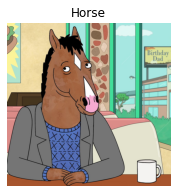

In [ ]:
img.show(y=learn.predict(img)[0])